#Logistic Regression: Model Training, Equation Extraction, and Probability Visualization


## 📘 Description

This notebook demonstrates logistic regression on synthetic binary classification data, focusing on extracting the fitted sigmoid-based equation. It includes data generation, model training, mathematical derivation, and visual validation of the decision boundary.


## Process

This notebook follows a structured approach to model binary classification using logistic regression and understand the mathematics behind the fitted model.

### 1. Import Libraries  
Load essential libraries for data generation, model training, and visualization.

### 2. Generate Sample Binary Classification Data  
Use a synthetic dataset with two classes that can be separated with a linear boundary.

### 3. Scatter Plot of Data Points  
Visualize the two classes in a 2D space to confirm separability and interpretability.

### 4. Train Logistic Regression Model  
Fit a logistic regression model to the data using `scikit-learn`. The model learns parameters \( w \) and \( b \) that define the decision boundary.

### 5. Equation Extraction  
Extract the learned coefficients from the model to write the sigmoid-based decision function:

$$
\hat{y} = \frac{1}{1 + e^{-(wx + b)}}
$$

### 6. Plot the Decision Boundary and Verify the Equation
This step visualizes the decision boundary learned by the logistic regression model and confirms that the extracted equation correctly represents the classifier’s behavior by fixing one feature ($ x_2 $) and plotting the predicted probability as a 2D curve with respect to the other feature ($ x_1 $).

##🔢 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap


##🧪 2. Generate Sample Binary Classification Data

In [2]:
# Generate a simple binary classification dataset
X, y = make_classification(n_samples=200, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=100)

# Check shape
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (200, 2)
y shape: (200,)


##📊 3. Scatter Plot of Data Points

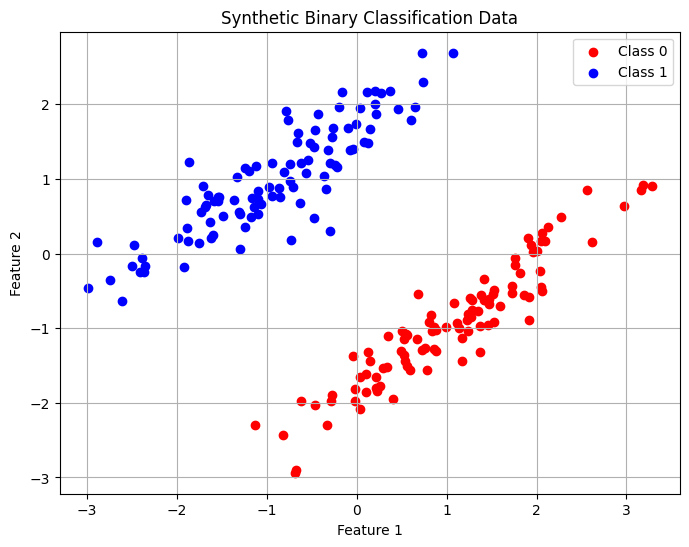

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title("Synthetic Binary Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


##🤖 4. Train Logistic Regression Model

In [4]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Extract coefficients
w = model.coef_[0]
b = model.intercept_[0]

print(f"Fitted weights: w1 = {w[0]:.2f}, w2 = {w[1]:.2f}")
print(f"Intercept: b = {b:.2f}")


Fitted weights: w1 = -2.20, w2 = 2.48
Intercept: b = 0.18


##🧮 5. Equation Extraction

In [5]:
f"The equation is 1/(1+e^(-({w[0]:.2f}x_1+{w[1]:.2f}x_2+{b:.2f})))"

'The equation is 1/(1+e^(-(-2.20x_1+2.48x_2+0.18)))'

The equation is:
$$
\hat{y} = \frac{1}{1 + e^{-(-2.28 x_1 + 2.48 x_2 + 0.18)}}
$$


##🗺️ 6. Plot the Decision Boundary and Verify the Equation

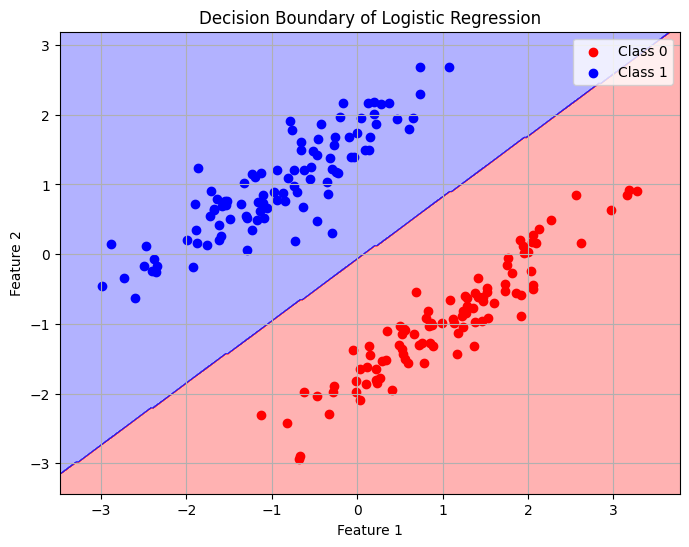

In [6]:
# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'blue']))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title("Decision Boundary of Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


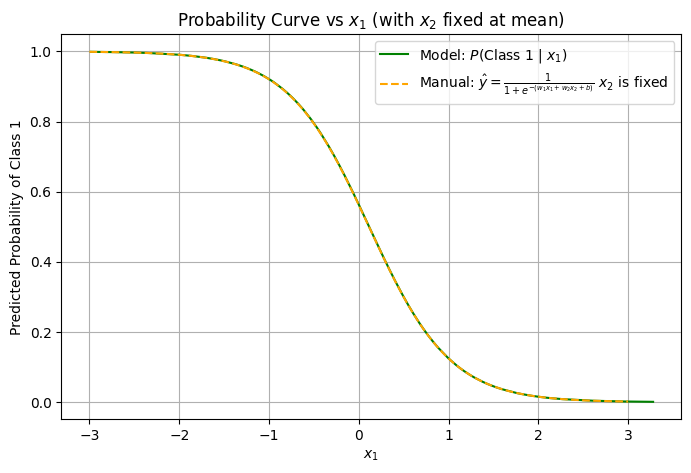

In [7]:
# --- Prepare data for both curves ---

# From model: vary x₁, fix x₂ at mean
x1_data = X[:, 0].reshape(-1, 1)
x2_fixed_data = np.full_like(x1_data, np.mean(X[:, 1]))
x1_sorted = np.sort(x1_data, axis=0)
X_plot = np.hstack((x1_sorted, x2_fixed_data))
probs_model = model.predict_proba(X_plot)[:, 1]

# From manual equation
w1, w2, b = -2.20, 2.48, 0.18
x1_theory = np.linspace(-3, 3, 300).reshape(-1, 1)
x2_fixed = np.mean(X[:, 1])
logits = w1 * x1_theory + w2 * x2_fixed + b
probs_theory = 1 / (1 + np.exp(-logits))

# --- Plot both curves together ---
plt.figure(figsize=(8, 5))
plt.plot(x1_sorted, probs_model, color='green', label='Model: $P$(Class 1 | $x_1$)')
plt.plot(x1_theory, probs_theory, color='orange', linestyle='--', label='Manual: $\hat{y} = \\frac{1}{1 + e^{-(w_1 x_1+w_2 x_2 + b)}}$ $x_2$ is fixed')
plt.title("Probability Curve vs $x_1$ (with $x_2$ fixed at mean)")
plt.xlabel("$x_1$")
plt.ylabel("Predicted Probability of Class 1")
plt.grid(True)
plt.legend()
plt.show()
